****
# Introduction #
****

**The goal of this Notebook is to successfully predict whether an Employee stands a chance to stay in the company or not**

**If you liked this Notebook or you found this helpful kindly Upvote :)**


In [1]:
# importing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

****
# Reading and displaying Data #
****

In [2]:
df=pd.read_csv(r"C:\Imp\SamanyuK\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


*****
# Data Preprocessing #
****

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


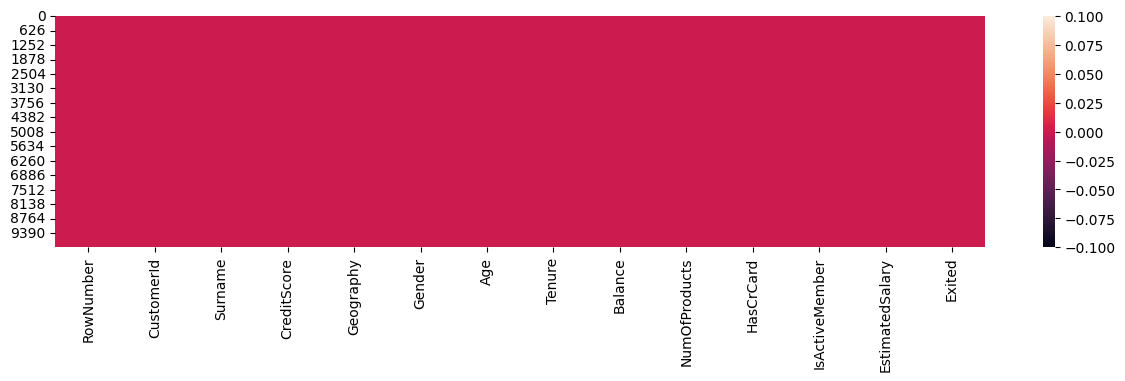



 RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool


In [4]:
# First things first let is check if we have any null values

plt.figure(figsize=(15,3))
sns.heatmap(df.isnull())
plt.show()
print('\n\n',df.isnull().any())

In [5]:
# It appears we have no null values :)
# Let us remove any duplicate records 

df.drop_duplicates(inplace=True,keep='first')

In [6]:
# Let us drop some unwanted columns

col=['RowNumber','CustomerId','Surname']
df.drop(columns=col,inplace=True,axis=1)

In [7]:
# We have various features with different datatypes, let us make sure all of them are in a position to pass through our ML Models

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
print(df['Geography'].value_counts(),'\n\n')
print(df['Gender'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 


Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [9]:
# We can wither one hot encode the categorical columns or just label encode them
# In this notebook I will be one hot encoding the values using get_dummies for Geography Feature and just Label Encode Gender

tdf=pd.get_dummies(df['Geography'])
df=pd.concat([df,tdf],axis=1)
df[['France','Germany','Spain']]=df[['France','Germany','Spain']].astype(int)
df.drop(columns='Geography',inplace=True,axis=1)
df['Gender']=df['Gender'].apply(lambda x:0 if x=='Female' else 1)

In [10]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  France           10000 non-null  int32  
 11  Germany          10000 non-null  int32  
 12  Spain            10000 non-null  int32  
dtypes: float64(2), int32(3), int64(8)
memory usage: 898.6 KB


In [12]:
# We have a clean data
# Now let us visualize their distributions

****
# Data Visualization #
****

**Will only be visualizing distribution and spread of features**

In [13]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'France',
       'Germany', 'Spain'],
      dtype='object')

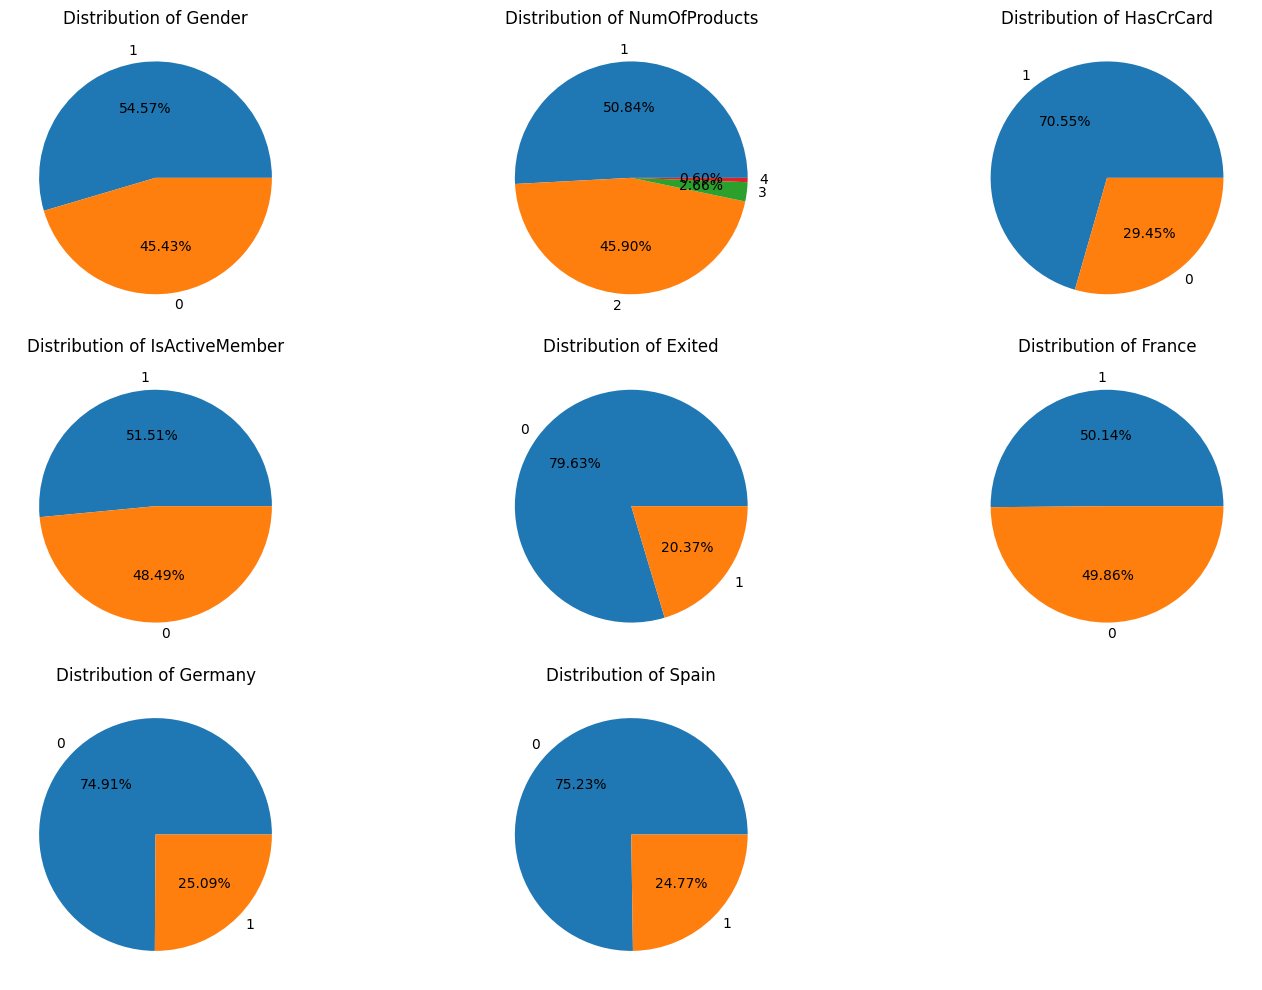

In [14]:
# Let us look at some of the distributions

cols_to_dist=['Gender','NumOfProducts','HasCrCard', 'IsActiveMember','Exited', 'France','Germany', 'Spain']
fig,axs=plt.subplots(3,3,figsize=(15,10))
axs=axs.flatten()
i=0
for col in cols_to_dist:
    tdf=df[col].value_counts().reset_index()
    axs[i].pie(tdf['count'],labels=tdf[col],autopct='%.2f%%')
    axs[i].set_title(f'Distribution of {col}')
    i=i+1
axs[8].set_visible(False)
plt.tight_layout()
plt.show()

In [15]:
# It also appears our data is unbalanced :(
# Let us look at the distribution of some continuous variables

cols=df.columns[~df.columns.isin(cols_to_dist)]
print(cols)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], dtype='object')


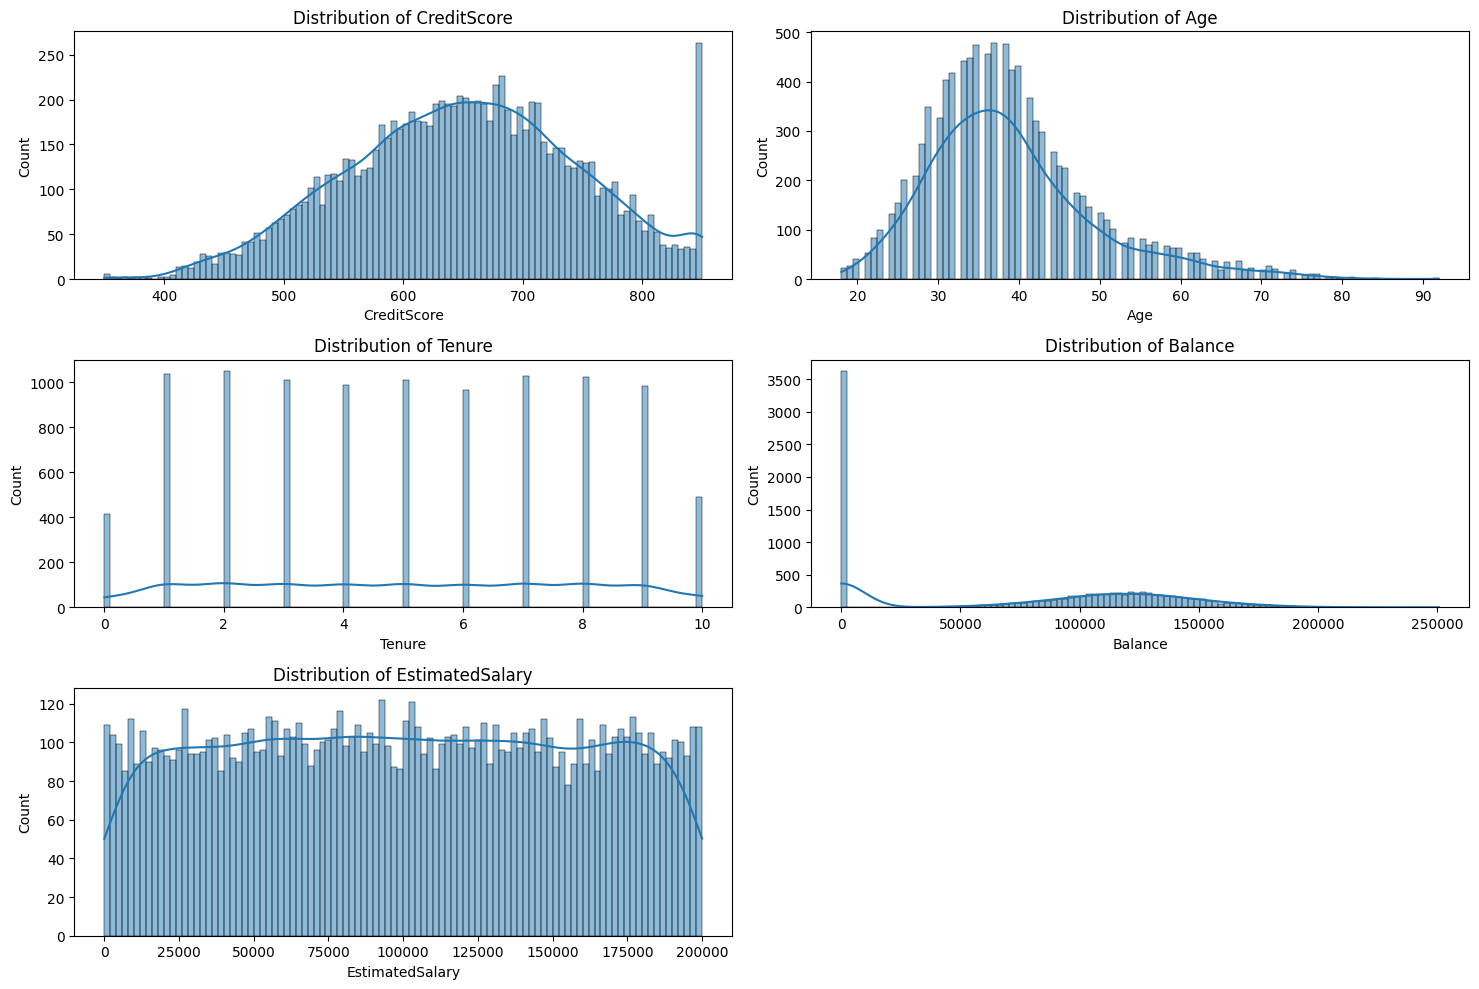

In [16]:
fig,axs=plt.subplots(3,2,figsize=(15,10))
axs=axs.flatten()
i=0
for col in cols:
    sns.histplot(data=df,x=col,bins=100,kde=True,ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    i=i+1
plt.tight_layout()
axs[5].set_visible(False)
plt.show()

In [17]:
# Calculating Mutual Information and visualizing correlation along with MI

from sklearn.feature_selection import mutual_info_classif

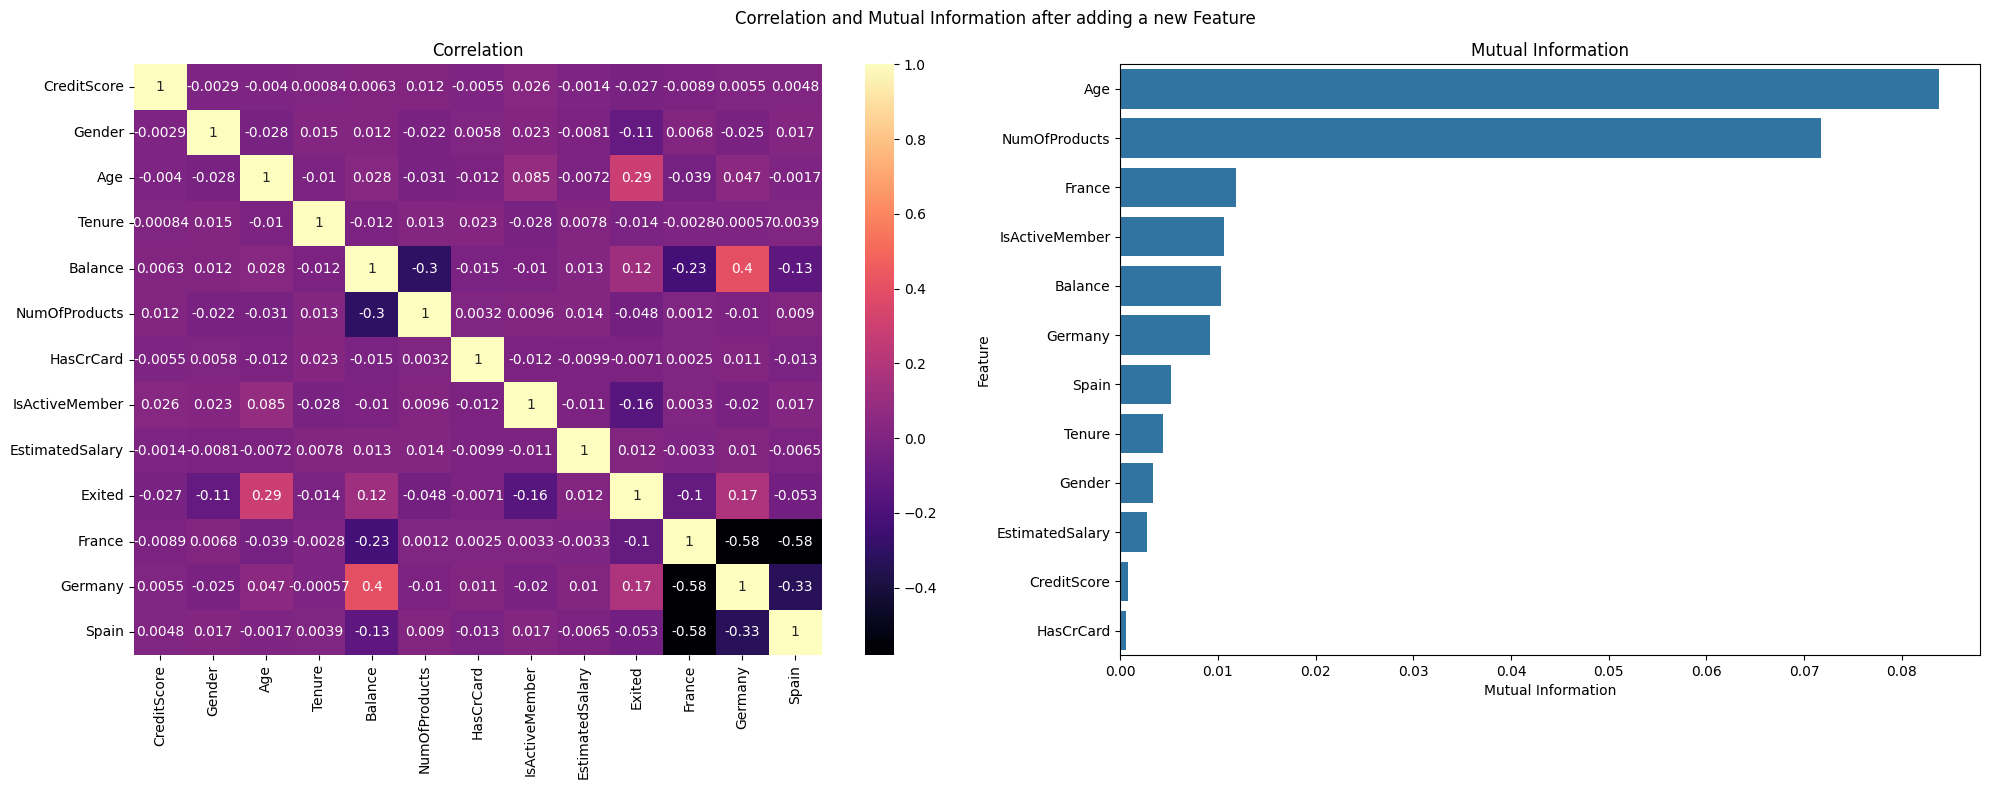

In [18]:
tdf=df.copy()  
x=tdf.drop(columns='Exited')
y=tdf['Exited']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information after adding a new Feature')
plt.tight_layout()
plt.show()

****
# Data Preparation #
****

In [19]:
# importing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
x=df.drop(columns='Exited')
y=df['Exited']

In [21]:
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

In [22]:
print(x_t.shape,x_te.shape,y_t.shape,y_te.shape)

(7500, 12) (2500, 12) (7500,) (2500,)


In [23]:
# Scaling the data (Not required for tree and ensemble models)

ss=StandardScaler()
x_t=ss.fit_transform(x_t)
x_te=ss.transform(x_te)

****
# Models #
****

In [24]:
# Importing

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import tensorflow as te
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [25]:
Models=['Logistic Regression','KNN','Decision Tree','Random Forest','Adaboost','Gradient Boost','Support Vector Machines','ANN']

cr_t=[] #Storing Training classification reports
cr=[] #Storing classification reports
cm_t=[] # Storing Confusion matrix for Training set
cm=[] # Storing Confusion matrix for Testing set
acc_t=[] # Storing accuracy score for Training set
acc=[] # Storing accuracy score for testing set
p_t=[] # Storing precison score for Training set
p=[] # Storing precison score for Testing set
r_t=[] # Storing recall score for Training set
r=[] # Storing recall score for Testing set
f1_t=[] # Storing f1 score for Training set
f1=[] # Storing f1 score for Testing set

## Logistic Regression ##

In [26]:
reg=LogisticRegression()
params={'penalty':['l1','l2'],'solver':['saga','liblinear'],'C':list(np.arange(1,21))}
nreg=RandomizedSearchCV(reg,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
nreg.fit(x_t,y_t)
print(nreg.best_params_)
print(nreg.best_score_)

{'solver': 'saga', 'penalty': 'l2', 'C': 6}
0.8082666666666668


In [27]:
nreg=nreg.best_estimator_
predt1=nreg.predict(x_t)
pred1=nreg.predict(x_te)

In [28]:
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

## K Nearest Neighbors ##

In [29]:
knn=KNeighborsClassifier()
params={'n_neighbors':list(np.arange(2,50))}
nknn=RandomizedSearchCV(knn,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
nknn.fit(x_t,y_t)
print(nknn.best_params_)
print(nknn.best_score_)

{'n_neighbors': 21}
0.826


In [30]:
nknn=nknn.best_estimator_
predt2=nknn.predict(x_t)
pred2=nknn.predict(x_te)

In [31]:
cr.append(classification_report(y_te,pred2))
cm_t.append(confusion_matrix(y_t,predt2))
cm.append(confusion_matrix(y_te,pred2))
acc_t.append(accuracy_score(y_t,predt2))
acc.append(accuracy_score(y_te,pred2))
p_t.append(precision_score(y_t,predt2))
p.append(precision_score(y_te,pred2))
r_t.append(recall_score(y_t,predt2))
r.append(recall_score(y_te,pred2))
f1_t.append(f1_score(y_t,predt2))
f1.append(f1_score(y_te,pred2))

## Decision Tree ##

In [32]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas
params={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',n_iter=5)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
best_alpha=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.00035992447349311035}
0.8476000000000001


In [33]:
dt=DecisionTreeClassifier(ccp_alpha=best_alpha)
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51))}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)

{'min_samples_split': 13, 'min_samples_leaf': 28, 'criterion': 'entropy'}
0.8533333333333333


In [34]:
ndt=ndt.best_estimator_
predt3=ndt.predict(x_t)
pred3=ndt.predict(x_te)

In [35]:
cr.append(classification_report(y_te,pred3))
cm_t.append(confusion_matrix(y_t,predt3))
cm.append(confusion_matrix(y_te,pred3))
acc_t.append(accuracy_score(y_t,predt3))
acc.append(accuracy_score(y_te,pred3))
p_t.append(precision_score(y_t,predt3))
p.append(precision_score(y_te,pred3))
r_t.append(recall_score(y_t,predt3))
r.append(recall_score(y_te,pred3))
f1_t.append(f1_score(y_t,predt3))
f1.append(f1_score(y_te,pred3))

## Random Forest ##

In [36]:
rf=RandomForestClassifier(class_weight ='balanced')
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51)),
        'max_features':['sqrt','log2',None],
       'n_estimators':[250]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)

{'n_estimators': 250, 'min_samples_split': 31, 'min_samples_leaf': 10, 'max_features': None, 'criterion': 'entropy'}
0.8262666666666666


In [37]:
nrf=nrf.best_estimator_
predt4=nrf.predict(x_t)
pred4=nrf.predict(x_te)

In [38]:
cr.append(classification_report(y_te,pred4))
cm_t.append(confusion_matrix(y_t,predt4))
cm.append(confusion_matrix(y_te,pred4))
acc_t.append(accuracy_score(y_t,predt4))
acc.append(accuracy_score(y_te,pred4))
p_t.append(precision_score(y_t,predt4))
p.append(precision_score(y_te,pred4))
r_t.append(recall_score(y_t,predt4))
r.append(recall_score(y_te,pred4))
f1_t.append(f1_score(y_t,predt4))
f1.append(f1_score(y_te,pred4))

## AdaBoost ##

In [39]:
ada=AdaBoostClassifier(algorithm='SAMME')
params={
    'n_estimators': [200],
    'learning_rate': np.arange(0.01, 2.01, 0.01)}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)

{'n_estimators': 200, 'learning_rate': 0.74}
0.8542666666666667


In [40]:
nada=nada.best_estimator_
predt5=nada.predict(x_t)
pred5=nada.predict(x_te)

In [41]:
cr.append(classification_report(y_te,pred5))
cm_t.append(confusion_matrix(y_t,predt5))
cm.append(confusion_matrix(y_te,pred5))
acc_t.append(accuracy_score(y_t,predt5))
acc.append(accuracy_score(y_te,pred5))
p_t.append(precision_score(y_t,predt5))
p.append(precision_score(y_te,pred5))
r_t.append(recall_score(y_t,predt5))
r.append(recall_score(y_te,pred5))
f1_t.append(f1_score(y_t,predt5))
f1.append(f1_score(y_te,pred5))

## Gradient Boost ##

In [42]:
gb=GradientBoostingClassifier()
params={'n_estimators': [200], 'learning_rate': np.arange(0.01, 2.01, 0.01),'min_samples_split':list(np.arange(2,51)),
        'min_samples_leaf':list(np.arange(2,51)),'subsample': [0.5, 0.8, 1.0],'max_features':['sqrt','log2',None]}
ngb=RandomizedSearchCV(gb,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ngb.fit(x_t ,y_t)
print(ngb.best_params_)
print(ngb.best_score_)

{'subsample': 0.5, 'n_estimators': 200, 'min_samples_split': 45, 'min_samples_leaf': 16, 'max_features': None, 'learning_rate': 0.03}
0.8605333333333333


In [43]:
ngb=ngb.best_estimator_
predt6=nada.predict(x_t)
pred6=nada.predict(x_te)

In [44]:
cr.append(classification_report(y_te,pred6))
cm_t.append(confusion_matrix(y_t,predt6))
cm.append(confusion_matrix(y_te,pred6))
acc_t.append(accuracy_score(y_t,predt6))
acc.append(accuracy_score(y_te,pred6))
p_t.append(precision_score(y_t,predt6))
p.append(precision_score(y_te,pred6))
r_t.append(recall_score(y_t,predt6))
r.append(recall_score(y_te,pred6))
f1_t.append(f1_score(y_t,predt6))
f1.append(f1_score(y_te,pred6))

## Support Vector Machine ##

In [45]:
# Support Vector Machines are cool for smaller datasets but not so cool for a large dataset like this
# So lets downsample it
# Eitherways it is not a good model for these kinds of datasets so we can expect a low score

data = pd.concat([pd.DataFrame(x), pd.Series(y, name='Exited')], axis=1)
majority_class = data[data['Exited'] == 0]  
minority_class = data[data['Exited'] == 1]
majority_downsampled = resample(majority_class,replace=False,n_samples=500,random_state=42)
minority_downsampled = resample(minority_class, replace=False, n_samples=500, random_state=42)
downsampled_data = pd.concat([majority_downsampled, minority_downsampled])
X_downsampled = downsampled_data.drop('Exited', axis=1)
y_downsampled = downsampled_data['Exited']

print(X_downsampled.shape,y_downsampled.shape)

(1000, 12) (1000,)


In [46]:
x1_t,x1_te,y1_t,y1_te=train_test_split(X_downsampled,y_downsampled,test_size=0.25,random_state=20)

In [47]:
svc=SVC()
params= {'kernel': ['linear', 'poly', 'rbf']}
nsvr=GridSearchCV(svc,param_grid=params,scoring='accuracy', cv=5,n_jobs=-1)
nsvr.fit(x1_t, y1_t)
print(nsvr.best_params_)
print(nsvr.best_score_)

{'kernel': 'linear'}
0.6573333333333333


In [48]:
nsvr=nsvr.best_estimator_
predt7=nsvr.predict(x1_t)
pred7=nsvr.predict(x1_te)

In [49]:
cr.append(classification_report(y1_te,pred7))
cm_t.append(confusion_matrix(y1_t,predt7))
cm.append(confusion_matrix(y1_te,pred7))
acc_t.append(accuracy_score(y1_t,predt7))
acc.append(accuracy_score(y1_te,pred7))
p_t.append(precision_score(y1_t,predt7))
p.append(precision_score(y1_te,pred7))
r_t.append(recall_score(y1_t,predt7))
r.append(recall_score(y1_te,pred7))
f1_t.append(f1_score(y1_t,predt7))
f1.append(f1_score(y1_te,pred7))

## ANN ##

In [50]:
model=Sequential()

In [51]:
model.add(Dense(12,activation='relu'))

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(4,activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(1,activation='sigmoid'))

In [52]:
opt=te.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
modelh=model.fit(x_t,y_t,epochs=200)
pred_probs=model.predict(x_te)
pred8=(pred_probs > 0.5).astype(int)
pred_probs=model.predict(x_t)
pred8t=(pred_probs > 0.5).astype(int)

Epoch 1/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7884 - loss: 0.4933
Epoch 2/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4122
Epoch 3/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8304 - loss: 0.4035
Epoch 4/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8420 - loss: 0.3879
Epoch 5/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8520 - loss: 0.3816
Epoch 6/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8464 - loss: 0.3876
Epoch 7/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8501 - loss: 0.3780
Epoch 8/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8432 - loss: 0.3932
Epoch 9/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8492 - loss: 0.3888
Epoch 10/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.3810
Epoch 11/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8484 - loss: 0.3899
Epoch 12/200
235/235 ━━━━━━━━━━━━━━━━━━━━

In [54]:
cr.append(classification_report(y_te,pred8))
cm_t.append(confusion_matrix(y_t,pred8t))
cm.append(confusion_matrix(y_te,pred8))
acc_t.append(accuracy_score(y_t,pred8t))
acc.append(accuracy_score(y_te,pred8))
p_t.append(precision_score(y_t,pred8t))
p.append(precision_score(y_te,pred8))
r_t.append(recall_score(y_t,pred8t))
r.append(recall_score(y_te,pred8))
f1_t.append(f1_score(y_t,pred8t))
f1.append(f1_score(y_te,pred8))

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

****
# Model Evaluation Metrics #
****

In [56]:
for model, report in zip(Models, cr_t):
    print(f"Classification Report for {model}:\n{report}\n")

In [57]:
for model, report in zip(Models, cr):
    print(f"Classification Report for {model}:\n{report}\n")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2022
           1       0.59      0.20      0.30       478

    accuracy                           0.82      2500
   macro avg       0.71      0.58      0.60      2500
weighted avg       0.79      0.82      0.78      2500


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2022
           1       0.75      0.29      0.42       478

    accuracy                           0.85      2500
   macro avg       0.80      0.64      0.67      2500
weighted avg       0.83      0.85      0.82      2500


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2022
           1       0.70      0.49      0.57       478

    accuracy                           0.86      2500
   macr

In [58]:
m_t=pd.DataFrame({'Classification Algorithms':Models,'Training Accuracy':acc_t,'Training Precision':p_t,
                  'Training Recall':r_t,'Training F1 Score':f1_t})
m_t.sort_values(by=['Training Accuracy','Training Precision','Training Recall','Training F1 Score'],ascending=False).reset_index(drop=True)

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,Random Forest,0.880933,0.674895,0.824246,0.742131
1,Decision Tree,0.869467,0.768022,0.533034,0.629307
2,ANN,0.859733,0.670477,0.639513,0.654629
3,Adaboost,0.856133,0.771493,0.437460,0.558330
4,Gradient Boost,0.856133,0.771493,0.437460,0.558330
5,KNN,0.838533,0.779743,0.311097,0.444750
6,Logistic Regression,0.809200,0.608475,0.230276,0.334109
7,Support Vector Machines,0.660000,0.633987,0.769841,0.695341


In [59]:
m_te=pd.DataFrame({'Classification Algorithms':Models,'Testing Accuracy':acc,'Testing Precision':p,
                  'Testing Recall':r,'Testing F1 Score':f1})
m_te.sort_values(by=['Testing Accuracy','Testing Precision','Testing Recall','Testing F1 Score'],ascending=False).reset_index(drop=True)

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,Adaboost,0.8652,0.754513,0.437238,0.553642
1,Gradient Boost,0.8652,0.754513,0.437238,0.553642
2,Decision Tree,0.8616,0.696429,0.489540,0.574939
3,ANN,0.8468,0.606742,0.564854,0.585049
4,KNN,0.8464,0.752688,0.292887,0.421687
5,Random Forest,0.8388,0.568306,0.652720,0.607595
6,Logistic Regression,0.8204,0.587879,0.202929,0.301711
7,Support Vector Machines,0.6520,0.620690,0.737705,0.674157


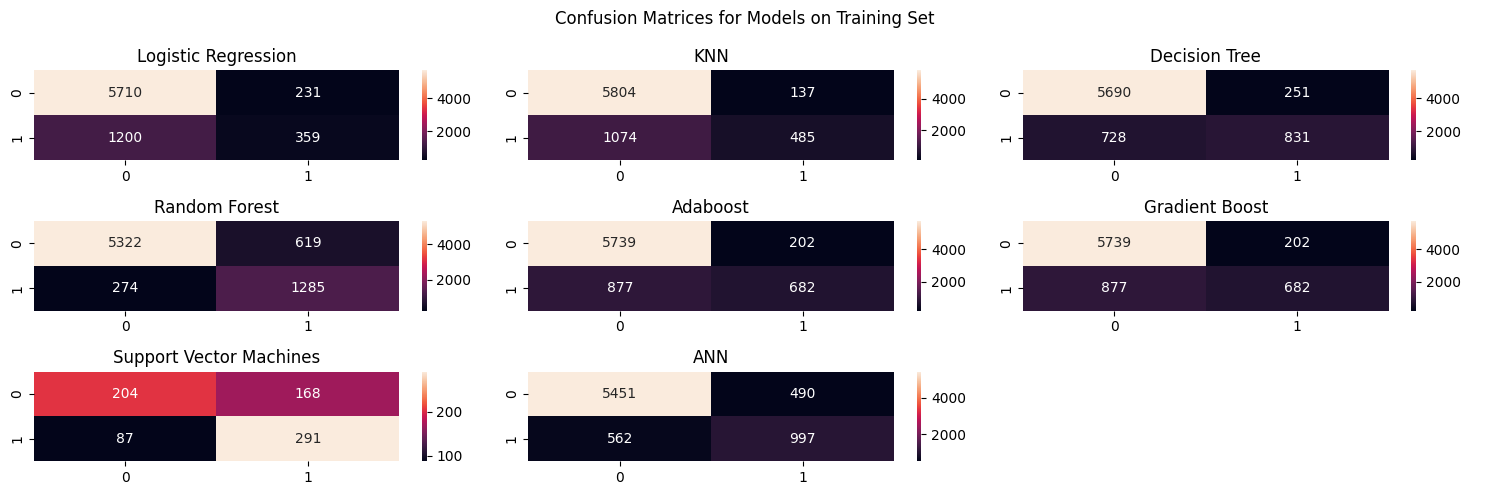

In [60]:
fig,ax=plt.subplots(3,3,figsize=(15,5))
r=0
c=0
for i,mod in enumerate(Models):
    sns.heatmap(cm_t[i],annot=True,fmt='d',ax=ax[r][c])
    ax[r][c].set_title(mod)
    c+=1
    if(c==3):
        r+=1
        c=0
if len(Models) < 9:
    ax[r, c].axis('off')
plt.suptitle('Confusion Matrices for Models on Training Set')
plt.tight_layout()
plt.show()

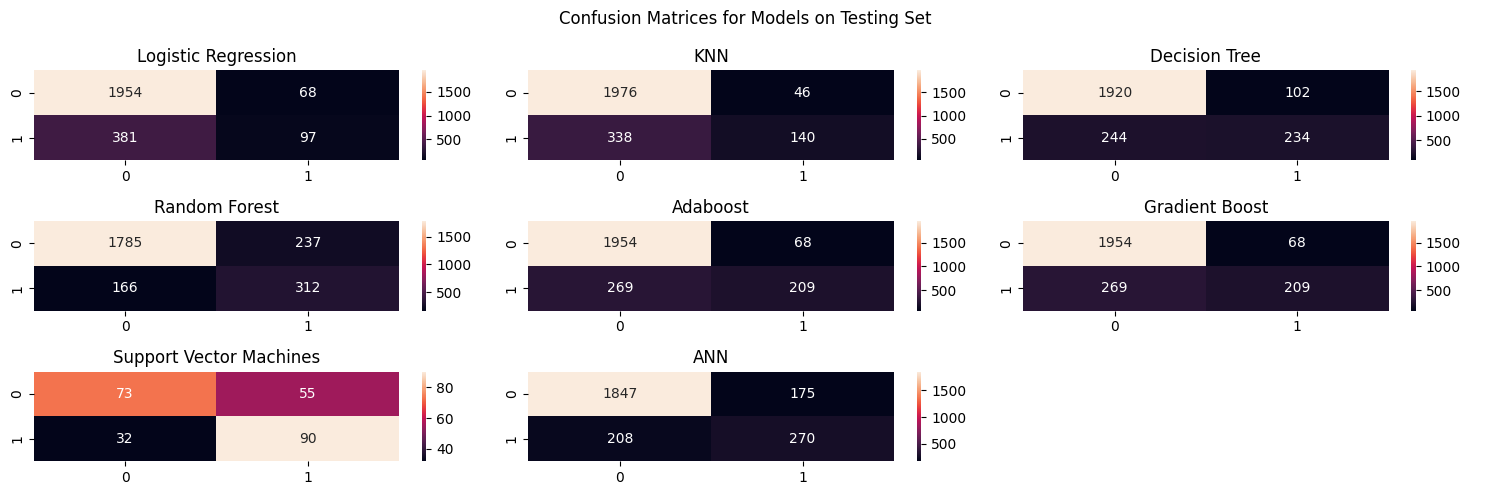

In [61]:
fig,ax=plt.subplots(3,3,figsize=(15,5))
r=0
c=0
for i,mod in enumerate(Models):
    sns.heatmap(cm[i],annot=True,fmt='d',ax=ax[r][c])
    ax[r][c].set_title(mod)
    c+=1
    if(c==3):
        r+=1
        c=0
if len(Models) < 9:
    ax[r, c].axis('off')
plt.suptitle('Confusion Matrices for Models on Testing Set')
plt.tight_layout()
plt.show()

****
# Conclusions #
****

1. Top Performers: Adaboost and Gradient Boost both achieved a testing accuracy of 86.52%, showcasing strong overall performance with equal metrics.
2. Decision Tree Performance: The Decision Tree classifier followed closely with a testing accuracy of 86.16% and a better recall of 48.95% compared to Adaboost and Gradient Boost.
3. ANN Insights: The Artificial Neural Network (ANN) achieved a testing accuracy of 84.68% but exhibited a relatively higher recall of 56.49%, indicating its ability to identify positive instances more effectively.
4. KNN Limitations: The K-Nearest Neighbors (KNN) model, while having a decent precision of 75.27%, demonstrated a lower recall of 29.29%, suggesting it struggles to detect positive cases.
5. Random Forest Insights: The Random Forest model, despite achieving a testing accuracy of 83.88%, had a recall of 65.27%, indicating it is better at identifying positives but sacrifices precision.
6. SVM Performance: Support Vector Machine (SVM) showed the lowest testing accuracy at 65.20%, though it had a relatively high recall of 73.77%, indicating it focuses more on identifying positives at the expense of overall accuracy.
7. Model Selection Considerations: The choice of the best classification algorithm should depend on the specific needs for precision versus recall, as some models excel in one area over the other.

****
# Feedback and Suggestions #
****

**Kindly provide feedback and suggestions to improve this notebook**

**If you liked this Notebook or you found this helpful kindly Upvote :)**